# Sage 10.1 on CoCalc

In [1]:
version()

'SageMath version 10.1, Release Date: 2023-08-20'

In [3]:
import gym

In [4]:
O = OctonionAlgebra(GF(7), 1, 3, 4)
J = JordanAlgebra(O)
J

Exceptional Jordan algebra constructed from Octonion algebra over Finite Field of size 7 with parameters (1, 3, 4)

In [3]:
J.gens()[-1]

[  0   0   0]
[  0   0  lk]
[  0 -lk   0]

In [2]:
import admcycles
admcycles

<module 'admcycles' from '/ext/sage/10.0/local/var/lib/sage/venv-python3.11.1/lib/python3.11/site-packages/admcycles/__init__.py'>

In [3]:
from distutils.version import LooseVersion
from pkg_resources import get_distribution
get_distribution("admcycles")

admcycles 1.4 (/ext/sage/10.0/local/var/lib/sage/venv-python3.11.1/lib/python3.11/site-packages)

In [5]:
version()

'SageMath version 10.0, Release Date: 2023-05-20'

In [4]:
@interact
def f(k = slider(-10, 10)):
    f(x) = k * sin(x) * exp(-0.1 * x**2)
    g = f.diff(x)
    p1 = plot(f, (x, -1, 10))
    p2 = plot(g, (x, -1, 10), color='red')
    return p1 + p2

Interactive function <function f at 0x7fa920f1c680> with 1 widget
  k: TransformIntSlider(value=0, description…

In [11]:
N = 4
A = [dyck_word for n in range(1, N) for dyck_word in DyckWords(n)]
B = [binary_tree for n in range(1, N) for binary_tree in BinaryTrees(n)]
concat_path = lambda D1, D2: DyckWord(list(D1) + list(D2))
concat_tree = lambda B1, B2: concat_path(B1.to_dyck_word(),
                                         B2.to_dyck_word()).to_binary_tree()
bij = Bijectionist(A, B)
bij.set_intertwining_relations((2, concat_path, concat_tree))

for D in sorted(bij.minimal_subdistributions_iterator(), key=lambda x: (len(x[0][0]), x)):
    print(ascii_art(D))

( [ /\ ], [ o ] )
(           [ o   ] )
(           [  \  ] )
( [ /\/\ ], [   o ] )
(           [   o ] )
( [  /\  ]  [  /  ] )
( [ /  \ ], [ o   ] )
(             [ o     ] )
(             [  \    ] )
(             [   o   ] )
(             [    \  ] )
( [ /\/\/\ ], [     o ] )
(             [ o   ] )
(             [  \  ] )
(             [   o ] )
( [    /\  ]  [  /  ] )
( [ /\/  \ ], [ o   ] )
(             [   o   ] )
( [  /\    ]  [  / \  ] )
( [ /  \/\ ], [ o   o ] )
(                     [   o,     o ] )
(                     [  /      /  ] )
( [           /\   ]  [ o      o   ] )
( [  /\/\    /  \  ]  [  \    /    ] )
( [ /    \, /    \ ], [   o  o     ] )


In [5]:
complex_plot((x + 1-3j)**2 + (x + 2j - 1.5)**2 + sin(x), (-10, 10), (-3, 3), cmap='twilight', plot_points=500, tiled=True)

In [6]:
## Wave functions and energies of a particle with mass m in a two-dimensional box with infinitely high potetial walls
## Define some natural constants

import ipywidgets as widgets

# Speed of light c in m s-1
c = 2.99792558*10^8;
# Elementary charge in C
qe = 1.602176*10^-19;
# Planck's constant h in J s
h = 6.62608*10^-34;
# hbar in J s
hbar = 1.05457*10^-34;
# mass of an electron in kg
me = 9.10938*10^-31;
# mass of a proton in kg
mp = 1.67262*10^-27;
# mass of a neutron in kg
mn = 1.67493*10^-27;
# epsilon_0 in J-1 C2 m-1
epsilon0 = 8.85419*10^-12;
# constante de Boltzmann in J K-1
kb = 1.38065*10^-23;
# Avogadro constant
NA = 6.02214*10^23;

var('x,y,L1,L2,n1,n2,m,font_size,figuresize');


@interact
def _(L1=slider(0,10.,1.,default=1.,label="box length L1 [Å]"),L2=slider(0,10.,1.,default=1.,label="box length L2 [Å]"),n1=slider(1,10,1,default=1,label="quantum number n1"),n2=slider(1,10,1,default=1,label="quantum number n2"),figuresize=slider(1,20,1,default=8,label="figure size"),showcontourplots=checkbox(False,label="Show contour plots"),particletype=selector(['electron', 'proton', 'He atom','C atom'],label="particle type (affects mass)"),functiontoshow=selector(['Psi','psi²'],label="function to show"),numcontours=slider(2,200,step_size=1,default=20,label="Number of contours in contour plots")):
    # define the mass of the particle
    if particletype == 'electron':
        m = me;
    if particletype == 'proton':
        m = mp;
    if particletype == 'He atom':
        m = 4.002602 / (NA*1000);
    if particletype == 'C atom':
        m = 12.0107 / (NA*1000);
    ## wave function and energy. n1, n2 are quantum numbers in x and y direction, L1 and L2 are the corresponding box lengths
    # Note that the x- and y coordinate are expected in Anstrøm. The energy is calculated in eV. 
    psi(x,y) = (2/sqrt(L1*10^(-10)*L2*10^(-10))) * sin(n1 * pi * (x/L1)) * sin(n2 * pi * (y/L2));
    energy = (((h^2 ) / (8 * m)) * ( ((n1^2) / ((L1*10^-10)^2)) + ((n2^2) / ((L2*10^-10)^2))) )*(6.24150974*10^18);
    
    # Print the particle mass and energy
    string1 = "m = %e kg" %(m)
    string2 = "E = %f eV" %energy
    pretty_print(html('<h5 align=left> %s \t %s</h5>' %(string1,string2)))
    
    if functiontoshow == 'Psi':
        # Create the 3D plot (and optionally the contour plot) of psi
        # Due to some limitations in the plot3d function, we have to add the axes labels as text3d objects
        # And in these objects it is not possible to use Latex notation. Therefore the psi has to be written in this ugly way and write 100pm instead of Angstrom
        plot1 = plot3d(psi/(2.*10^10),(x,0,L1),(y,0,L2),opacity=0.5,aspect_ratio=[1,1,1])
        show(plot1+text3d("x [100 pm]",(L1/2.,0,0))+text3d("y [100 pm]",(L2,L2/2,0))+text3d("psi / 2E10",(0,0,1)),figsize=figuresize)
        if showcontourplots == True:
            cplot = contour_plot(psi,(x,0,L1),(y,0,L2),fill=false,labels=True,axes=True,axes_labels=['x [100 pm]','y [100 pm]'],label_fmt="%2.3e",cmap='coolwarm',colorbar=true,contours=numcontours)
            show(cplot,figsize=figuresize)
    if functiontoshow == 'psi²':
        # Create the 3D plot (and optionally the contour plot) of psi
        plot2 = plot3d((psi*psi)/(2.*10^20),(x,0,L1),(y,0,L2),opacity=0.5,aspect_ratio=[1,1,1])
        show(plot2+text3d("x [100 pm]",(L1/2.,0,0))+text3d("y [100 pm]",(L2,L2/2,0))+text3d("psi²",(0,0,1)),figsize=figuresize)
        if showcontourplots == True:
            cplot2 = contour_plot(psi*psi,(x,0,L1),(y,0,L2),fill=false,labels=True,axes=True,axes_labels=['x [100 pm]','y [100 pm]'],label_fmt="%2.3e",cmap='coolwarm',colorbar=true,contours=numcontours)
            show(cplot2,figsize=figuresize)

Interactive function <function _ at 0x7f4d1a7a6de0> with 9 widgets
  L1: TransformFloatSlider(value=1.0, descr…

In [7]:
x, y = var('x y')
solve(2*x^2 + 1, x)
# second example, two equations:
ex1 = (x + y)^2 - 1
ex2 = x - y == 1
solve([ex1, ex2], [x, y])

[[x == 0, y == -1], [x == 1, y == 0]]

Animation with 5 frames
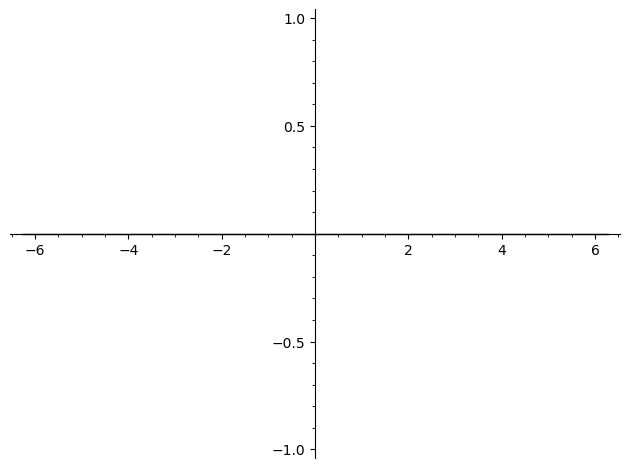

In [8]:
x = SR.var("x")
sines = [plot(c*sin(x), (-2*pi,2*pi), color=Color(c,0,0), ymin=-1, ymax=1) for c in sxrange(0,1,.2)]
a = animate(sines)
a.show()

## Testing Autograd

user question https://github.com/HIPS/autograd



In [9]:
import autograd.numpy as np

ModuleNotFoundError: No module named 'autograd'

In [0]:
from autograd import grad

In [0]:
preparser(False)

def tanh(x):
    y = np.exp(-2.0 * x)
    return (1.0 - y) / (1.0 + y)

In [0]:
grad_tanh = grad(tanh)

In [0]:
grad_tanh(1.0)

In [0]:
(tanh(1.0001) - tanh(0.9999)) / 0.0002